In [1]:
# Steps:
# 0. Import Libs
# 1. Preprocessing
# 2. Model
# 3. Compile
# 4. Fit
# 5. Evaluate
# 6. Predict

# Import Libraries

In [2]:
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.utils import plot_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

# Conect to Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# preprocessing & Load data

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

# Display ten categories of dataset

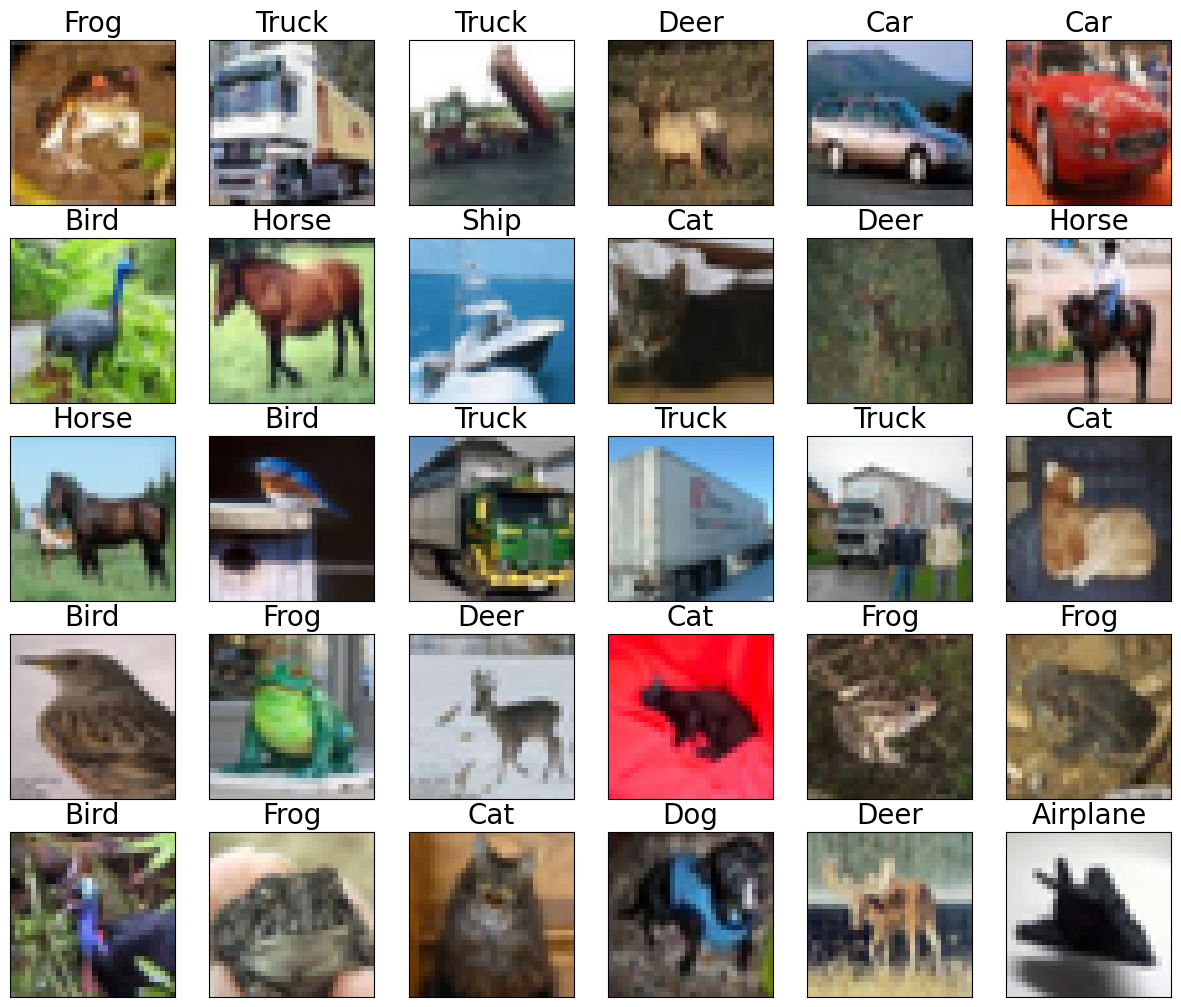

In [9]:
class_labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(15,15))



for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train[i][0]], fontsize=20)
plt.show()

In [10]:
X_train[100]

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]

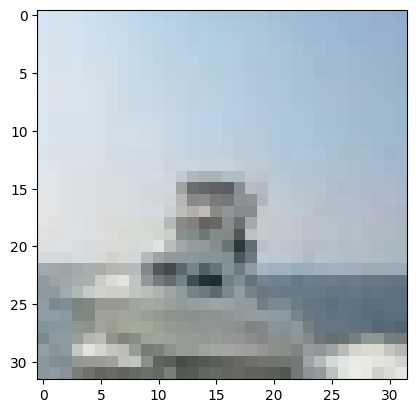

In [11]:
plt.imshow(X_train[100], cmap='gray')

In [12]:
y_train[100]

array([8], dtype=uint8)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Normalizatio

In [14]:
X_train, X_test = X_train/255.0 , X_test/255.0

#One-Hot Encoding

In [15]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Architecture of layers of DNN network model

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(250, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

#Model Compile

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Model training

In [19]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
400/400 [==============================] - 14s 30ms/step - loss: 2.0316 - accuracy: 0.2576 - val_loss: 1.8470 - val_accuracy: 0.3441
Epoch 2/10
400/400 [==============================] - 8s 20ms/step - loss: 1.8745 - accuracy: 0.3179 - val_loss: 1.8289 - val_accuracy: 0.3582
Epoch 3/10
400/400 [==============================] - 7s 19ms/step - loss: 1.8358 - accuracy: 0.3308 - val_loss: 1.7421 - val_accuracy: 0.3913
Epoch 4/10
400/400 [==============================] - 9s 22ms/step - loss: 1.8086 - accuracy: 0.3463 - val_loss: 1.7523 - val_accuracy: 0.3765
Epoch 5/10
400/400 [==============================] - 7s 17ms/step - loss: 1.7726 - accuracy: 0.3602 - val_loss: 1.7357 - val_accuracy: 0.3849
Epoch 6/10
400/400 [==============================] - 8s 21ms/step - loss: 1.7482 - accuracy: 0.3672 - val_loss: 1.7053 - val_accuracy: 0.3891
Epoch 7/10
400/400 [==============================] - 7s 17ms/step - loss: 1.7429 - accuracy: 0.3709 - val_loss: 1.6572 - val_accuracy: 0.410

# Model Summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 250)               768250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32128     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 801,668
Trainable params: 801,668
Non-trai

# Architecture diagram of the model

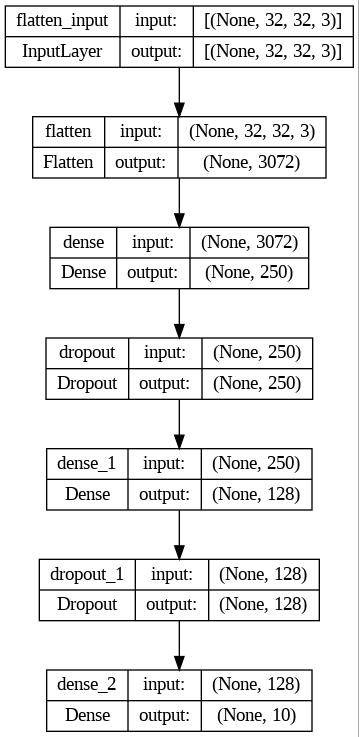

<Figure size 1000x2300 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 23))
plot_model(model, 'model.jpg', show_shapes=True)

#ٍEvaluate Model

In [22]:
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.6330 - accuracy: 0.4199


[1.6330211162567139, 0.41990000009536743]

In [23]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Display model accuracy chart

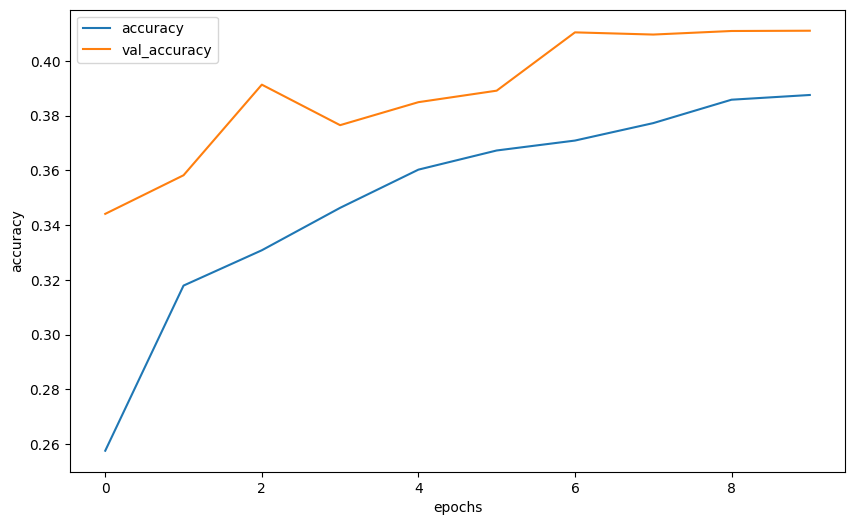

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Predicting the image

In [25]:
# Load the image
image = cv2.imread('dena.jpg', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

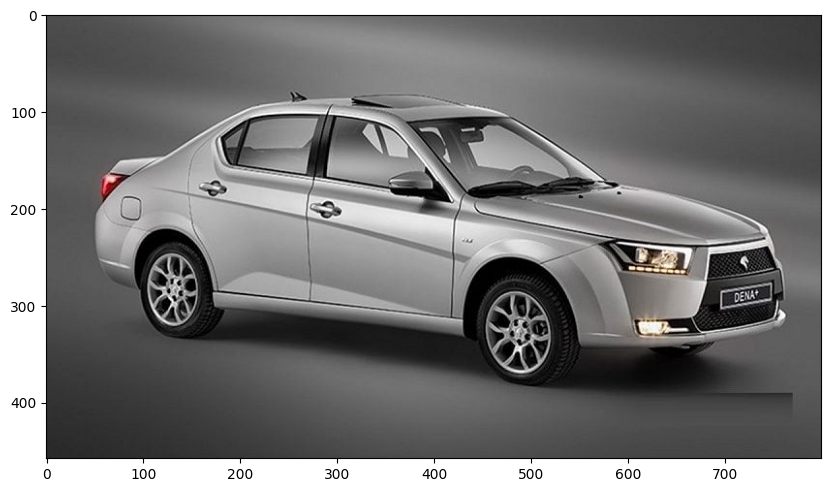

In [26]:
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.show()

In [27]:
image = cv2.resize(image, (32,32))

image = image / 255.0

image = image.reshape((1, 32, 32, 3))

In [28]:
prediction = model.predict(image)

1/1 [==============================] - 0s 104ms/step


In [29]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_labels[predicted_class])

Predicted class:  Car
